In [20]:
import numpy as np
import matplotlib.pyplot as plt

1 Load Matrix with acceleration data

In [21]:
matrix_3d = np.load('matrix_3d.npy')

In [22]:
matrix_3d.shape # nof_subjects, 7 days, 1440 minutes

(7537, 7, 1440)

2 Functions

In [23]:
def average_over_periods(data, period_length):
    """
    Averages data over specified period lengths.

    Parameters:
    data (numpy array): The input data array to be averaged.
    period_length (int): The length of each period over which to average the data.

    Returns:
    numpy array: The array containing the averaged data.
    """
    # Ensure the data can be evenly divided into periods of the specified length
    if len(data) % period_length != 0:
        raise ValueError("The length of the data is not evenly divisible by the period length.")

    # Reshape the data into chunks and calculate the mean for each chunk
    reshaped_data = data.reshape(-1, period_length)
    averaged_data = reshaped_data.mean(axis=1)

    return averaged_data

In [28]:
def resample_acceleration_data(matrix_3d, period_length):
    # Get the shape of the original matrix
    nof_subjects, nof_days, nof_minutes = matrix_3d.shape

    # Ensure the data can be evenly divided into periods of the specified length
    if nof_minutes % period_length != 0:
        raise ValueError("The length of the data (1440) is not evenly divisible by the period length. Period_length must be a factor of 1440.")

    # Calculate the new number of minutes after resampling
    new_nof_minutes = nof_minutes // period_length

    # Initialize a new 3D matrix to store the resampled data
    matrix_3d_resampled = np.zeros((nof_subjects, nof_days, new_nof_minutes))

    # Iterate over each subject and each day
    for subject_idx in range(nof_subjects):
        for day_idx in range(nof_days):
            # Get the acceleration vector for the current subject and day
            acceleration_vector = matrix_3d[subject_idx, day_idx]

            # Apply the average_over_periods function to the acceleration vector
            resampled_vector = average_over_periods(acceleration_vector, period_length)

            # Store the resampled vector in the new 3D matrix
            matrix_3d_resampled[subject_idx, day_idx] = resampled_vector

    return matrix_3d_resampled


3 Which values can I use for the period length?

In [30]:
import math

number = 1440
factors = []

for i in range(1, int(math.sqrt(number)) + 1):
    if number % i == 0:
        factors.append(i)
        factors.append(number // i)

factors.sort()

print(factors)


[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 30, 32, 36, 40, 45, 48, 60, 72, 80, 90, 96, 120, 144, 160, 180, 240, 288, 360, 480, 720, 1440]


In [31]:
period_length = 10
matrix_3d_resampled = resample_acceleration_data(matrix_3d, period_length)

In [32]:
# Extract data for the given subject and day
subject_idx = 100
day_idx = 0
data = matrix_3d[subject_idx, day_idx]
data_resampled = matrix_3d_resampled[subject_idx, day_idx]


In [34]:
# Save the matrix_3d_resampled array to a file
np.save('matrix_3d_resampled.npy', matrix_3d_resampled)

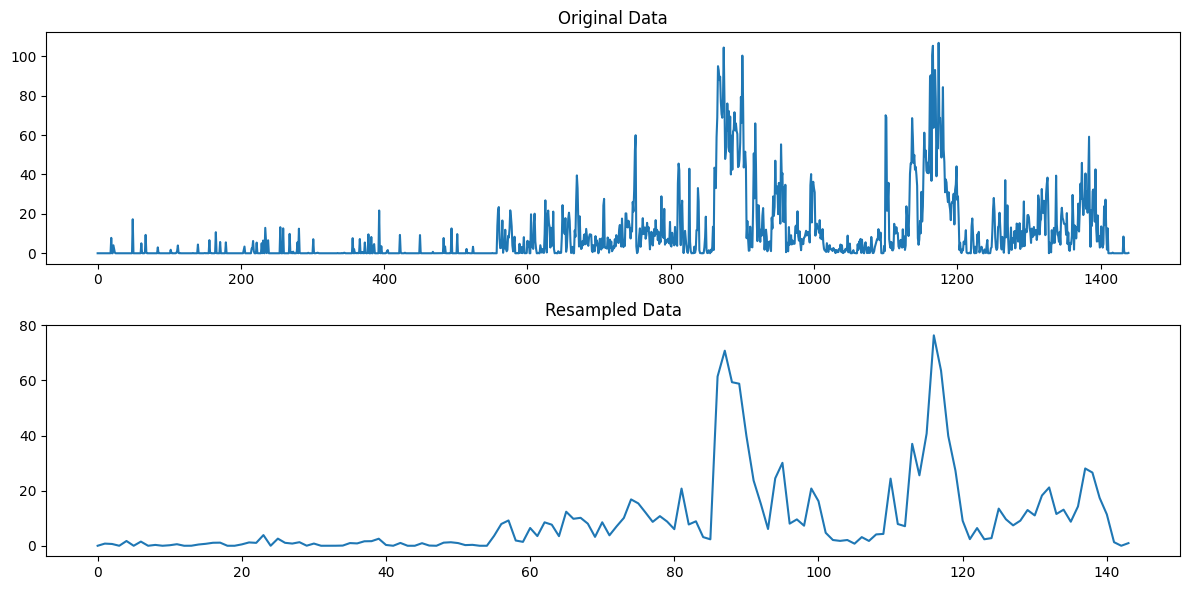

In [35]:
fig, axs = plt.subplots(2, figsize=(12, 6))

axs[0].plot(data)
axs[0].set_title('Original Data')

axs[1].plot(data_resampled)
axs[1].set_title('Resampled Data')

plt.tight_layout()

Look for pandas resample. It does this automatically in one line of code.